In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [265]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [266]:
data_test= pd.read_csv('data_for_testing.csv', delimiter=";")
data_from_users= pd.read_csv('data_from_users.csv', delimiter=";")
users_featured= pd.read_csv('users_featured.csv', delimiter=";")

In [267]:
data_test.isna().sum()

user_settings_crypto_unlocked              0
plan                                       0
num_contacts                               0
age                                        0
duration                                   0
total_amount_of_transactions               0
amount_of_transactions_out                 0
min_usd_out                                0
max_usd_out                                0
mean_usd_out                               0
sum_usd_out                                0
amount_of_transactions_in                  0
min_usd_in                                 0
max_usd_in                                 0
mean_usd_in                                0
sum_usd_in                                 0
count_type_atm                             0
count_type_card_payment                    0
count_type_exchange                        0
count_type_fee                             0
count_type_tax                             0
count_type_transfer_out                    0
count_type

In [268]:
data_from_users

,country,user_settings_crypto_unlocked,plan,num_contacts,brands,age,duration,total_amount_of_transactions,amount_of_transactions_out,min_usd_out,...,push_black_friday,push_blue_tuesday,push_joining_anniversary,push_lost_card_order,push_promo,push_reengagement_active_funds,push_silver_engagement_fees_saved,push_silver_engagement_inactive_card,sms_metal_reserve_plan,sms_reengagement_active_funds
0,ES,0,STANDARD,3,Apple,27,9,520.0,357.0,0.58,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,LT,1,STANDARD,75,Apple,34,17,133.0,106.0,0.94,...,0.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0
2,IE,0,STANDARD,71,Apple,23,7,268.0,225.0,0.04,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,IE,0,STANDARD,219,Apple,38,16,140.0,126.0,1.87,...,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
4,GB,0,STANDARD,0,Apple,27,17,50.0,41.0,1.50,...,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15539,PL,0,STANDARD,0,Android,22,10,91.0,58.0,0.05,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15540,PL,0,STANDARD,0,Apple,34,15,10.0,6.0,0.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15541,GB,0,STANDARD,16,Android,41,11,1062.0,983.0,0.01,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15542,IE,0,PAID,44,Apple,42,17,23.0,13.0,2.13,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [269]:
users_featured

,user_id,birth_year,country,city,created_date_x,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,...,push_black_friday,push_blue_tuesday,push_joining_anniversary,push_lost_card_order,push_promo,push_reengagement_active_funds,push_silver_engagement_fees_saved,push_silver_engagement_inactive_card,sms_metal_reserve_plan,sms_reengagement_active_funds
0,user_0,1992,ES,Madrid,2018-09-10 18:46:42.843855,0,STANDARD,1.0,1.0,3,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,user_1,1985,LT,Klaipeda,2018-01-11 18:53:10.531146,1,STANDARD,NaN,NaN,75,...,0.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0
2,user_2,1996,IE,Carrickmacross,2018-11-29 17:29:16.879324,0,STANDARD,NaN,NaN,71,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,user_3,1981,IE,Dublin,2018-02-17 11:58:08.319664,0,STANDARD,NaN,NaN,219,...,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
4,user_4,1992,GB,London,2018-01-08 18:40:21.097856,0,STANDARD,NaN,NaN,0,...,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15539,user_15539,1997,PL,Bralin,2018-08-05 05:56:40.787458,0,STANDARD,1.0,1.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15540,user_15540,1985,PL,Poznań,2018-03-29 12:19:05.567779,0,STANDARD,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15541,user_15541,1978,GB,London,2018-07-13 15:56:50.339746,0,STANDARD,1.0,1.0,16,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15542,user_15542,1977,IE,Dublin,2018-01-07 15:53:43.719983,0,PAID,1.0,1.0,44,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


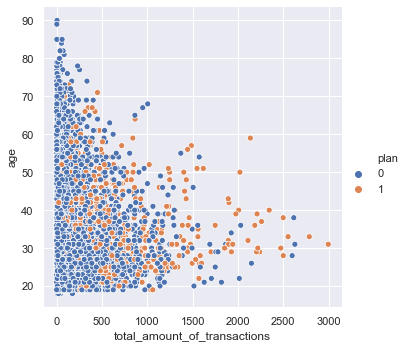

In [270]:
sns.relplot(x="total_amount_of_transactions", y="age", hue="plan", data=data_test)

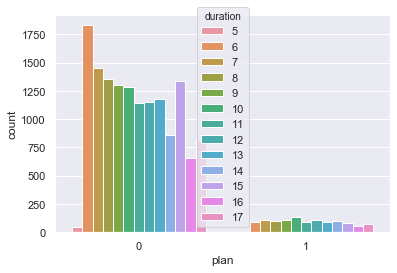

In [271]:
sns.countplot('plan',hue='duration',data=data_test)

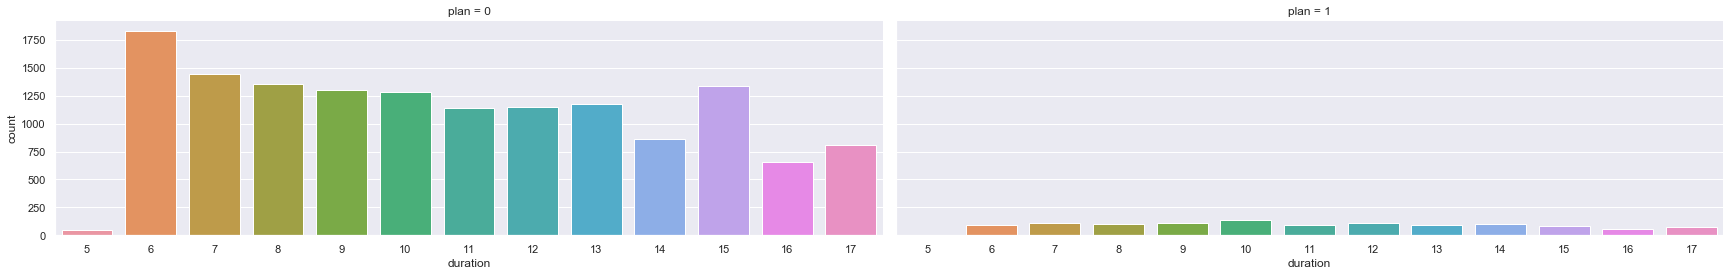

In [272]:
sns.catplot(x="duration", col="plan",
                data=data_test, kind="count",
                height=4, aspect=3)

In [273]:
duration_freqs = pd.crosstab(index=data_test['duration'], columns=data_test['plan'])
duration_freqs.columns=['STANDARD','PAID']
duration_freqs

,STANDARD,PAID
duration,,
5,48,2
6,1830,92
7,1448,107
8,1351,103
9,1298,109
10,1284,137
11,1144,93
12,1150,112
13,1177,89


In [274]:
duration_freqs['percentage_STANDARD'] = duration_freqs[['STANDARD', 'PAID']].apply(lambda x: 100 * x[0] / (x[0] + x[1]), axis=1)
duration_freqs['percentage_PAID'] = duration_freqs[['STANDARD', 'PAID']].apply(lambda x: 100 * x[1] / (x[0] + x[1]), axis=1)
duration_freqs['duration'] = duration_freqs.index
duration_freqs.head()
duration_freqs

,STANDARD,PAID,percentage_STANDARD,percentage_PAID,duration
duration,,,,,
5,48,2,96.000000,4.000000,5
6,1830,92,95.213319,4.786681,6
7,1448,107,93.118971,6.881029,7
8,1351,103,92.916094,7.083906,8
9,1298,109,92.253021,7.746979,9


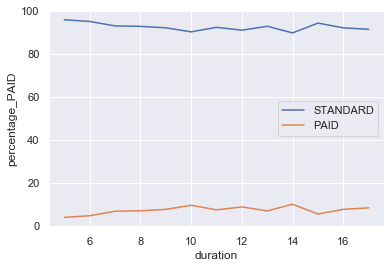

In [286]:
# stylistic command
sns.set()
sns.lineplot(x='duration', y='percentage_STANDARD', data=duration_freqs, label="STANDARD")
sns.lineplot(x='duration', y='percentage_PAID', data=duration_freqs, label="PAID")


In [292]:
user_settings_crypto_unlocked_freqs = pd.crosstab(index=data_test['user_settings_crypto_unlocked'], columns=data_test['plan'])
user_settings_crypto_unlocked_freqs.columns=['STANDARD','PAID']
user_settings_crypto_unlocked_freqs
user_settings_crypto_unlocked_freqs['percentage_STANDARD'] = user_settings_crypto_unlocked_freqs[['STANDARD', 'PAID']].apply(lambda x: 100 * x[0] / (x[0] + x[1]), axis=1)
user_settings_crypto_unlocked_freqs['percentage_PAID'] = user_settings_crypto_unlocked_freqs[['STANDARD', 'PAID']].apply(lambda x: 100 * x[1] / (x[0] + x[1]), axis=1)
user_settings_crypto_unlocked_freqs['user_settings_crypto_unlocked'] = user_settings_crypto_unlocked_freqs.index
user_settings_crypto_unlocked_freqs.head()
user_settings_crypto_unlocked_freqs

,STANDARD,PAID,percentage_STANDARD,percentage_PAID,user_settings_crypto_unlocked
user_settings_crypto_unlocked,,,,,
0,12155,554,95.640884,4.359116,0
1,2239,596,78.977072,21.022928,1


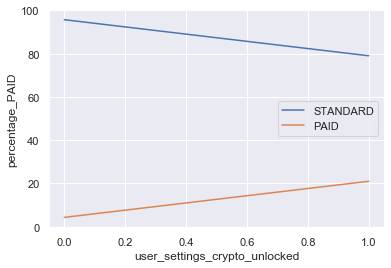

In [293]:
# stylistic command
sns.set()
sns.lineplot(x='user_settings_crypto_unlocked', y='percentage_STANDARD', data=user_settings_crypto_unlocked_freqs, label="STANDARD")
sns.lineplot(x='user_settings_crypto_unlocked', y='percentage_PAID', data=user_settings_crypto_unlocked_freqs, label="PAID")

In [116]:
from sklearn.model_selection import train_test_split

X = data_test.drop(columns=['plan']).values
X_columns = data_test.drop(columns=['plan']).columns
y = data_test['plan'].values

X.shape

(15544, 51)

In [117]:
data_test.shape

(15544, 52)

In [118]:
y.shape

(15544,)

In [119]:
type(y)

numpy.ndarray

In [120]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.2, stratify=y)
y_ts.shape

(3109,)

Imbalance

In [123]:
target='plan'

0    14394
1     1150
Name: plan, dtype: int64


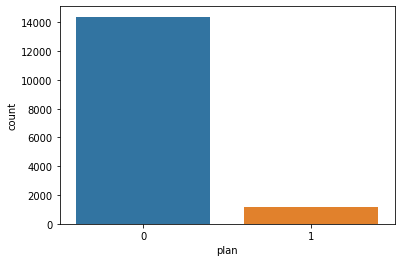

In [124]:
ax=sns.countplot(x= target, data= data_test)
print(data_test['plan'].value_counts())

In [96]:
100* (14394/float(data_test.shape[0]))

92.60164693772516

In [97]:
100*(1150/float(data_test.shape[0]))

7.3983530622748335

In [98]:
from sklearn.metrics import classification_report ,f1_score, roc_auc_score, roc_curve, recall_score , precision_score,accuracy_score , precision_recall_fscore_support

In [99]:
def generate_model_report (y_actual, y_predicted):
    print("Accuracy =", accuracy_score(y_actual, y_predicted))
    print("Recall =", recall_score(y_actual, y_predicted))
    print("Precision =", precision_score(y_actual, y_predicted))
    print("F1 Score =", f1_score(y_actual, y_predicted))
    pass

In [103]:
def generate_auc_roc_curve(clf, X_ts):
    y_pred_proba = clf.predict_proba(X_ts)[:,1]
    fpr ,tpr, thresholds = roc_curve(y_ts, y_pred_proba)
    auc=roc_auc_score(y_ts,y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve=" +str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [104]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression().fit(X_tr, y_tr)
Y_Test_Pred=clf.predict(X_ts)
generate_model_report(y_ts, Y_Test_Pred)

Accuracy = 0.9408169829527179
Recall = 0.2565217391304348
Precision = 0.8194444444444444
F1 Score = 0.39072847682119205


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


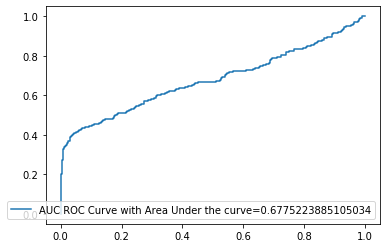

In [105]:
generate_auc_roc_curve(clf, X_ts)

UNDERSAMPLING

In [125]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
rus=RandomUnderSampler()
X_under, y_under = rus.fit_sample(X_tr, y_tr)
ros=RandomOverSampler()
X_over, y_over = rus.fit_sample(X_tr, y_tr)

print('Original dataset:') 
_, c = np.unique(y_tr, return_counts=True) 
print('Total number of examples:', len(y_tr)) 
print('class 0: {:.2f}% of total samples'.format(c[0]/c.sum()*100)) 
print('class 1: {:.2f}% of total samples'.format(c[1]/c.sum()*100))

print('\nOversampled dataset:') 
_, c = np.unique(y_over, return_counts=True) 
print('Total number of examples:', len(y_over)) 
print('class 0: {:.2f}% of total samples'.format(c[0]/c.sum()*100)) 
print('class 1: {:.2f}% of total samples'.format(c[1]/c.sum()*100))

print('\nUndersampled dataset:') 
_, c = np.unique(y_under, return_counts=True) 
print('Total number of examples:', len(y_under)) 
print('class 0: {:.2f}% of total samples'.format(c[0]/c.sum()*100)) 
print('class 1: {:.2f}% of total samples'.format(c[1]/c.sum()*100))

Original dataset:
Total number of examples: 12435
class 0: 92.60% of total samples
class 1: 7.40% of total samples

Oversampled dataset:
Total number of examples: 1840
class 0: 50.00% of total samples
class 1: 50.00% of total samples

Undersampled dataset:
Total number of examples: 1840
class 0: 50.00% of total samples
class 1: 50.00% of total samples


In [138]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.911


In [139]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
steps = [('over', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.910


LogisticRegression

In [72]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_tr, y_tr)
lr_pred = log_reg.predict(X_ts)
print('accuracy: {:.2f}%'.format(accuracy_score(y_ts, lr_pred)*100))

accuracy: 94.08%


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Other ML algorithms

In [144]:
# Import the relevant algorithms
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier

# We will use the default arguments for all classifiers
mlp= MLPClassifier()
knn= KNeighborsClassifier()
dtc= DecisionTreeClassifier()
var = VarianceThreshold()
rf = RandomForestClassifier(n_estimators=50, n_jobs=-1)

In [181]:
from sklearn.feature_selection import VarianceThreshold
var = VarianceThreshold()
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
sampler = SMOTE()
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()


In [145]:
# Train the above classifiers
mlp.fit(X_tr, y_tr)
knn.fit(X_tr, y_tr)
dtc.fit(X_tr, y_tr)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [146]:
# Evaluate the classifiers
preds=mlp.predict(X_ts)
print ('Neural Network :  {:.2f}%'.format(accuracy_score(y_ts, preds)*100))
preds=knn.predict(X_ts)
print ('k Nearest Neighbors :  {:.2f}%'.format(accuracy_score(y_ts, preds)*100))
preds=dtc.predict(X_ts)
print ('Decision Tree :  {:.2f}%'.format(accuracy_score(y_ts, preds)*100))

Neural Network :  96.53%
k Nearest Neighbors :  92.41%
Decision Tree :  96.37%


In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)

pipe1 = Pipeline([('scaler', sc),
                  ('selector', var),
                  ('sampler', sampler),
                  ('model', rf)])

grid1 = {'selector__threshold': [0, 0.2, 0.4],
         'model__n_estimators': [20, 50, 100]}

clf = GridSearchCV(pipe1, grid1,cv=4)
clf.fit(X_tr, y_tr)
from sklearn.metrics import classification_report , accuracy_score , precision_recall_fscore_support
preds=clf.predict(X_ts)
print(clf.best_params_, '\n')
print('accuracy: {:.2f}%'.format(accuracy_score(y_ts, preds)*100))

print(classification_report(y_ts, preds))

{'model__n_estimators': 50, 'selector__threshold': 0} 

accuracy: 96.53%
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2879
           1       0.73      0.85      0.78       230

    accuracy                           0.97      3109
   macro avg       0.86      0.91      0.88      3109
weighted avg       0.97      0.97      0.97      3109



In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

pipe1 = Pipeline([('scaler', sc),
                  ('selector', var),
                  ('sampler', sampler),
                  ('model', rf)])

grid1 = {'selector__threshold': [0, 0.2, 0.4],
         'model__n_estimators': [20, 50, 100]}

clf = GridSearchCV(pipe1, grid1,cv=2)
clf.fit(X_tr, y_tr)
from sklearn.metrics import classification_report , accuracy_score , precision_recall_fscore_support
preds=clf.predict(X_ts)
print(clf.best_params_, '\n')
print('accuracy: {:.2f}%'.format(accuracy_score(y_ts, preds)*100))

print(classification_report(y_ts, preds))

{'model__n_estimators': 50, 'selector__threshold': 0} 

accuracy: 97.23%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2879
           1       0.81      0.81      0.81       230

    accuracy                           0.97      3109
   macro avg       0.90      0.90      0.90      3109
weighted avg       0.97      0.97      0.97      3109



In [152]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

pipe1 = Pipeline([('scaler', sc),
                  ('selector', var),
                  ('sampler', sampler),
                  ('model', rf)])

grid1 = {'selector__threshold': [0, 0.2, 0.4],
         'model__n_estimators': [20, 50, 100]}

clf = GridSearchCV(pipe1, grid1,cv=2)
clf.fit(X_tr, y_tr)
preds=clf.predict(X_ts)
print(clf.best_params_, '\n')
print('accuracy: {:.2f}%'.format(accuracy_score(y_ts, preds)*100))

print(classification_report(y_ts, preds))

{'model__n_estimators': 50, 'selector__threshold': 0} 

accuracy: 97.07%
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2879
           1       0.81      0.79      0.80       230

    accuracy                           0.97      3109
   macro avg       0.90      0.89      0.89      3109
weighted avg       0.97      0.97      0.97      3109



In [191]:
#from sklearn.pipeline import Pipeline 
#from sklearn.preprocessing import StandardScaler 
#from sklearn.model_selection import GridSearchCV
#knn= KNeighborsClassifier()
#pipe_knn = Pipeline([('scaler', sc),
                  ('selector', var),
                  ('sampler', sampler),
                  ('model', knn)])
#param_grid = {'imputer__strategy': ['mean', 'median'],            
              'knn__n_neighbors': [3, 5, 7, 9, 11, 13]}
#grid = GridSearchCV(pipe, param_grid, cv=5) 
#grid.fit(X_tr, y_tr) 
#grid.best_estimator_

TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'SMOTE(k_neighbors=5, n_jobs=None, random_state=None, sampling_strategy='auto')' (type <class 'imblearn.over_sampling._smote.SMOTE'>) doesn't

In [ ]:
var = VarianceThreshold()
rf.fit(X_tr, y_tr)
rf.feature_importances_

In [166]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [167]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

sampler = SMOTE()

In [168]:
#for c, imp in sorted(zip(X_columns, rf.feature_importances_), key=lambda pair: pair[1], reverse=True):
 # print('{:20}: {}'.format(c, imp))

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [165]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
steps = [('under', RandomUnderSampler()), ('model', mlp)]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.870


In [164]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neural_network import  MLPClassifier
mlp=MLPClassifier()
pipe_mlp = Pipeline([('scaler', sc),
                  ('selector', var),
                  ('sampler', sampler),
                  ('model', mlp)])


grid1 = {'selector__threshold': [0, 0.05, 0.1],
         'model__n_estimators': [20, 50, 100]}
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)
print(clf_mlp.best_params_, '\n')
print('accuracy: {:.2f}%'.format(accuracy_score(y_ts, preds_mlp)*100))

print(classification_report(y_ts, preds_mlp))
best_clf_mlp = clf_mlp.best_estimator_

F1 Score: 0.913


In [182]:
from sklearn.neural_network import  MLPClassifier
mlp=MLPClassifier()
pipe_mlp = Pipeline([('scaler', sc),
                  ('selector', var),
                  ('sampler', sampler),
                  ('model', mlp)])

grid_mlp = {'selector__threshold': [0, 0.2, 0.4],
            'model__hidden_layer_sizes': [(10,), (20,), (50,), (100,), (200,)],
            'model__activation' : ['identity', 'logistic', 'tanh', 'relu']}

clf_mlp = GridSearchCV(pipe_mlp, grid_mlp, cv=3)
clf_mlp.fit(X_tr, y_tr)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('selector',
                                        VarianceThreshold(threshold=0.0)),
                                       ('sampler',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('model',
                                        MLPClassifier(activation='relu',
                                                      alpha=0.0001,
                                                      batch_size='auto',
      

In [210]:
preds_mlp=clf_mlp.predict(X_ts)
print(clf_mlp.best_params_, '\n')
print('accuracy: {:.2f}%'.format(accuracy_score(y_ts, preds_mlp)*100))

print(classification_report(y_ts, preds_mlp))
best_clf_mlp = clf_mlp.best_estimator_

{'model__activation': 'logistic', 'model__hidden_layer_sizes': (200,), 'selector__threshold': 0} 

accuracy: 96.94%
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2879
           1       0.80      0.78      0.79       230

    accuracy                           0.97      3109
   macro avg       0.89      0.88      0.89      3109
weighted avg       0.97      0.97      0.97      3109



In [186]:
#from sklearn.naive_bayes import GaussianNB
#from sklearn.preprocessing import StandardScaler

#gaus=GaussianNB()

#pipe_Gauss = Pipeline([('scaler', sc),
                  ('selector', var),
                  ('sampler', sampler),
                  ('model', gaus)])

#grid_Gauss = {'selector__threshold': [0, 0.2, 0.3],
         'model__n_estimators': (priors=None, var_smoothing=1e-09)}

#clf = GridSearchCV(pipe_Gauss, grid_Gauss,cv=3)
#clf.fit(X_tr, y_tr)
#preds=clf.predict(X_ts)
#print(clf.best_params_, '\n')
#print('accuracy: {:.2f}%'.format(accuracy_score(y_ts, preds)*100))

#print(classification_report(y_ts, preds))

SyntaxError: invalid syntax (<ipython-input-186-eb96fa6ec599>, line 12)

In [189]:
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(X, y)
preds_RF=RF.predict(X_ts)
round(RF.score(X,y), 4)

0.9415

In [200]:
#from sklearn.metrics import accuracy_score, log_loss
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC, LinearSVC, NuSVC
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#classifiers = [
 #   KNeighborsClassifier(3),
  #  SVC(kernel="rbf", C=0.025, probability=True),
   # DecisionTreeClassifier(),
    #RandomForestClassifier(),
    #AdaBoostClassifier(),
    #GradientBoostingClassifier()]
#for classifier in classifiers:
 #   pipe_all = Pipeline(steps=[('classifier', classifier)])
  #  pipe_all.fit(X_tr, y_tr)   
    
   # print(classifier)
    #print("model score: %.2f" % pipe_all.score(X_ts, y_ts))


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
model score: 0.92
SVC(C=0.025, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
model score: 0.93
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
model score: 0.97
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
        

In [257]:
param_test1 = {'n_estimators':range(70,90,10)}
clf_gbc = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=2,max_depth=100,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=-1, cv=5)
clf_gbc.fit(X_tr,y_tr)
preds_gbc=clf_gbc.predict(X_ts)
print(clf_gbc.best_params_, '\n')
print('accuracy: {:.2f}%'.format(accuracy_score(y_ts, preds_gbc)*100))

print(classification_report(y_ts, preds_gbc))
best_clf_gbc = clf_gbc.best_estimator_

{'n_estimators': 80} 

accuracy: 98.17%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2879
           1       0.93      0.81      0.87       230

    accuracy                           0.98      3109
   macro avg       0.96      0.90      0.93      3109
weighted avg       0.98      0.98      0.98      3109

